In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [90]:
df = pd.read_csv("../datos/datos_outputs/datos_concatenados.csv")
df_muestra = df.sample(n=10000, random_state=42)

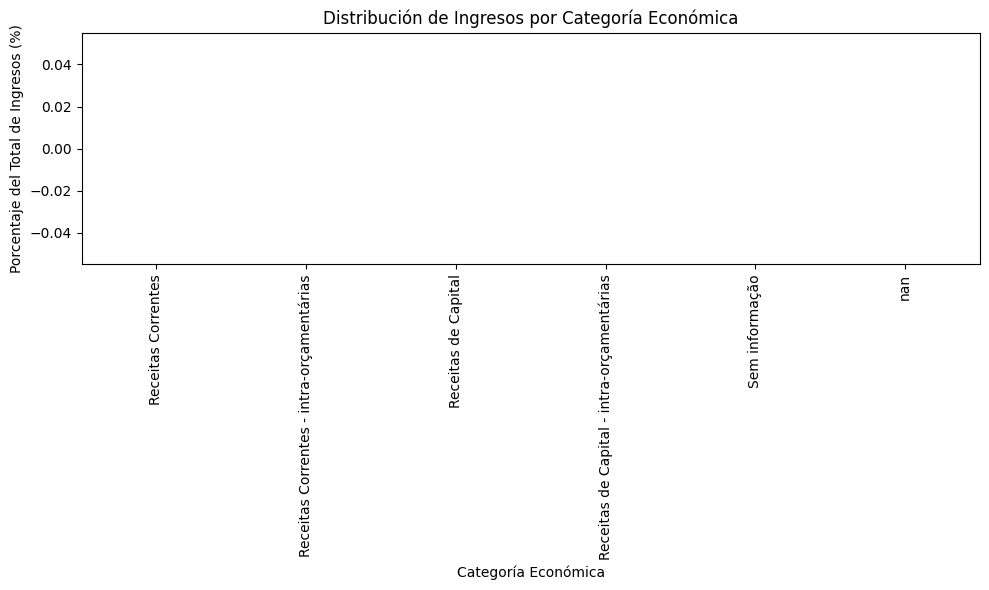

In [91]:
df_muestra["VALOR REALIZADO"] = pd.to_numeric(df_muestra["VALOR REALIZADO"], errors='coerce')

df_muestra["CATEGORÍA ECONÓMICA"] = df_muestra["CATEGORÍA ECONÓMICA"].astype(str)

categoria_ingresos = df_muestra.groupby("CATEGORÍA ECONÓMICA")["VALOR REALIZADO"].sum()

porcentaje_ingresos = 100 * categoria_ingresos / categoria_ingresos.sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=porcentaje_ingresos.index, y=porcentaje_ingresos.values)
plt.title("Distribución de Ingresos por Categoría Económica")
plt.ylabel("Porcentaje del Total de Ingresos (%)")
plt.xlabel("Categoría Económica")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## No tiene sentido hacer esta exploración, por la cantidad de valores nulos o vacios

In [92]:
df_muestra["FECHA DE LANZAMIENTO"] = pd.to_datetime(df_muestra["FECHA DE LANZAMIENTO"], errors="coerce")
df_muestra["AÑO"] = df_muestra["FECHA DE LANZAMIENTO"].dt.year

ingresos_por_año = df_muestra.groupby("AÑO")["VALOR REALIZADO"].sum()

ingresos_por_año.barplot( marker="o", color="b")
sns.barplot(x=porcentaje_ingresos.index, y=porcentaje_ingresos.values)

plt.title("Evolución de los Ingresos Realizados por Año")
plt.ylabel("Ingresos Realizados")
plt.xlabel("Año")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## ESTAMOS EN LAS MISMAS VALOR REALIZADO NO ES UNA COLUMNA CON DATOS ROBUSTOS Y FIABLES

C:\Users\almaz\AppData\Local\Temp\ipykernel_2828\1077071623.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_muestra["FECHA DE LANZAMIENTO"] = pd.to_datetime(df_muestra["FECHA DE LANZAMIENTO"], errors="coerce")


AttributeError: 'Series' object has no attribute 'barplot'

In [ ]:
unidades_gestoras_unicas = df_muestra["CÓDIGO UNIDAD GESTORA"].nunique()
print(f"Cantidad de unidades gestoras únicas: {unidades_gestoras_unicas}")

frecuencia_unidades_gestoras = df_muestra["CÓDIGO UNIDAD GESTORA"].value_counts()

print("\nLas 10 unidades gestoras más frecuentes:")
print(frecuencia_unidades_gestoras.head())

## Estas son las 10 unidades gestoras mas utilizadas

Cantidad de unidades gestoras únicas: 281

Las 10 unidades gestoras más frecuentes:
CÓDIGO UNIDAD GESTORA
170013.0    998
167086.0    208
673001.0    175
193034.0    141
135037.0    124
Name: count, dtype: int64


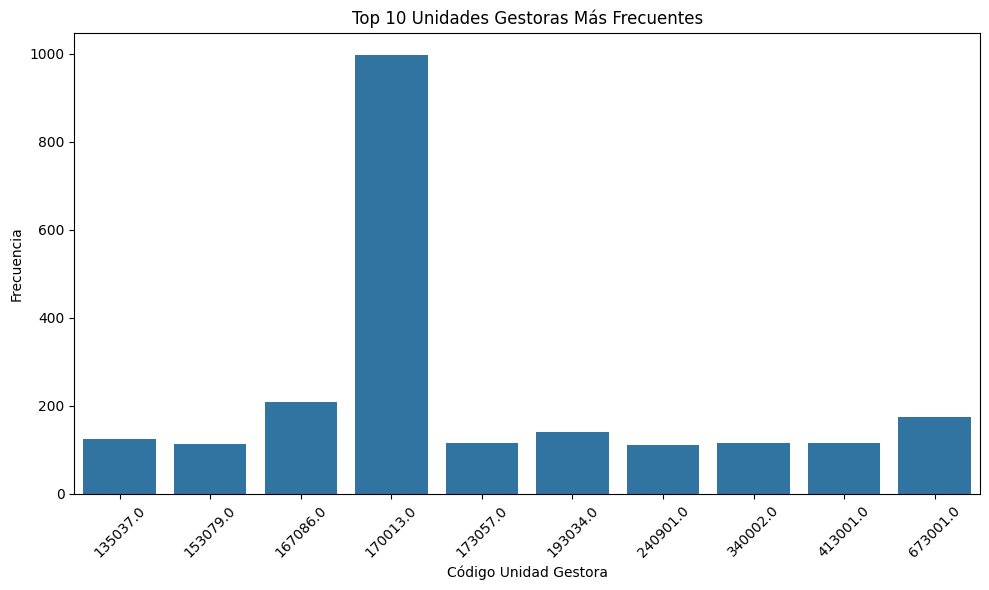

In [ ]:
top_10_unidades_gestoras = frecuencia_unidades_gestoras.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_unidades_gestoras.index, y=top_10_unidades_gestoras.values)
plt.title("Top 10 Unidades Gestoras Más Frecuentes")
plt.xlabel("Código Unidad Gestora")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


int64


In [ ]:
ingresos_previstos_unidad = df_muestra.groupby("CÓDIGO UNIDAD GESTORA")["VALOR PREVISTO ACTUALIZADO"].sum()
ingresos_previstos_unidad.unique()

## Muchos valores sin valor real, mucho 0, mucho nulo

array(['0,00253355000,00773546169,000,000,000,000,000,000,000,000,000,000,000,000,000,00',
       '0,00',
       '0,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,00',
       '0,0048240,000,00',
       '0,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,00',
       '0,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,004027908,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,000,005492641,000,000,000,000,000,000,000,000,000,00',
       '3705293349,000,000,000,000,00', '25748860,000,00', '0,000,00',
       '0,0017157522,000,000,000,000,000,000,000,000,000,000,000,000,00',
       '0,000,000,000,000,000,000,000,000,000

C:\Users\almaz\AppData\Local\Temp\ipykernel_2828\3828284197.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


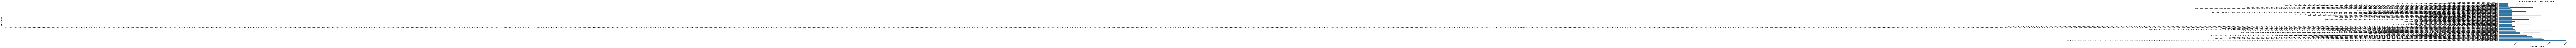

In [ ]:
ingresos_previstos_unidad = df_muestra.groupby("CÓDIGO UNIDAD GESTORA")["VALOR PREVISTO ACTUALIZADO"].sum()

top_10_ingresos_unidad = ingresos_previstos_unidad

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_ingresos_unidad.index, y=top_10_ingresos_unidad.values)
plt.title("Top 10 Unidades Gestoras con Mayor Ingreso Previsto")
plt.xlabel("Código Unidad Gestora")
plt.ylabel("Ingreso Previsto")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Por lo que realmente no tiene mucho sentido seguir con esta exploración

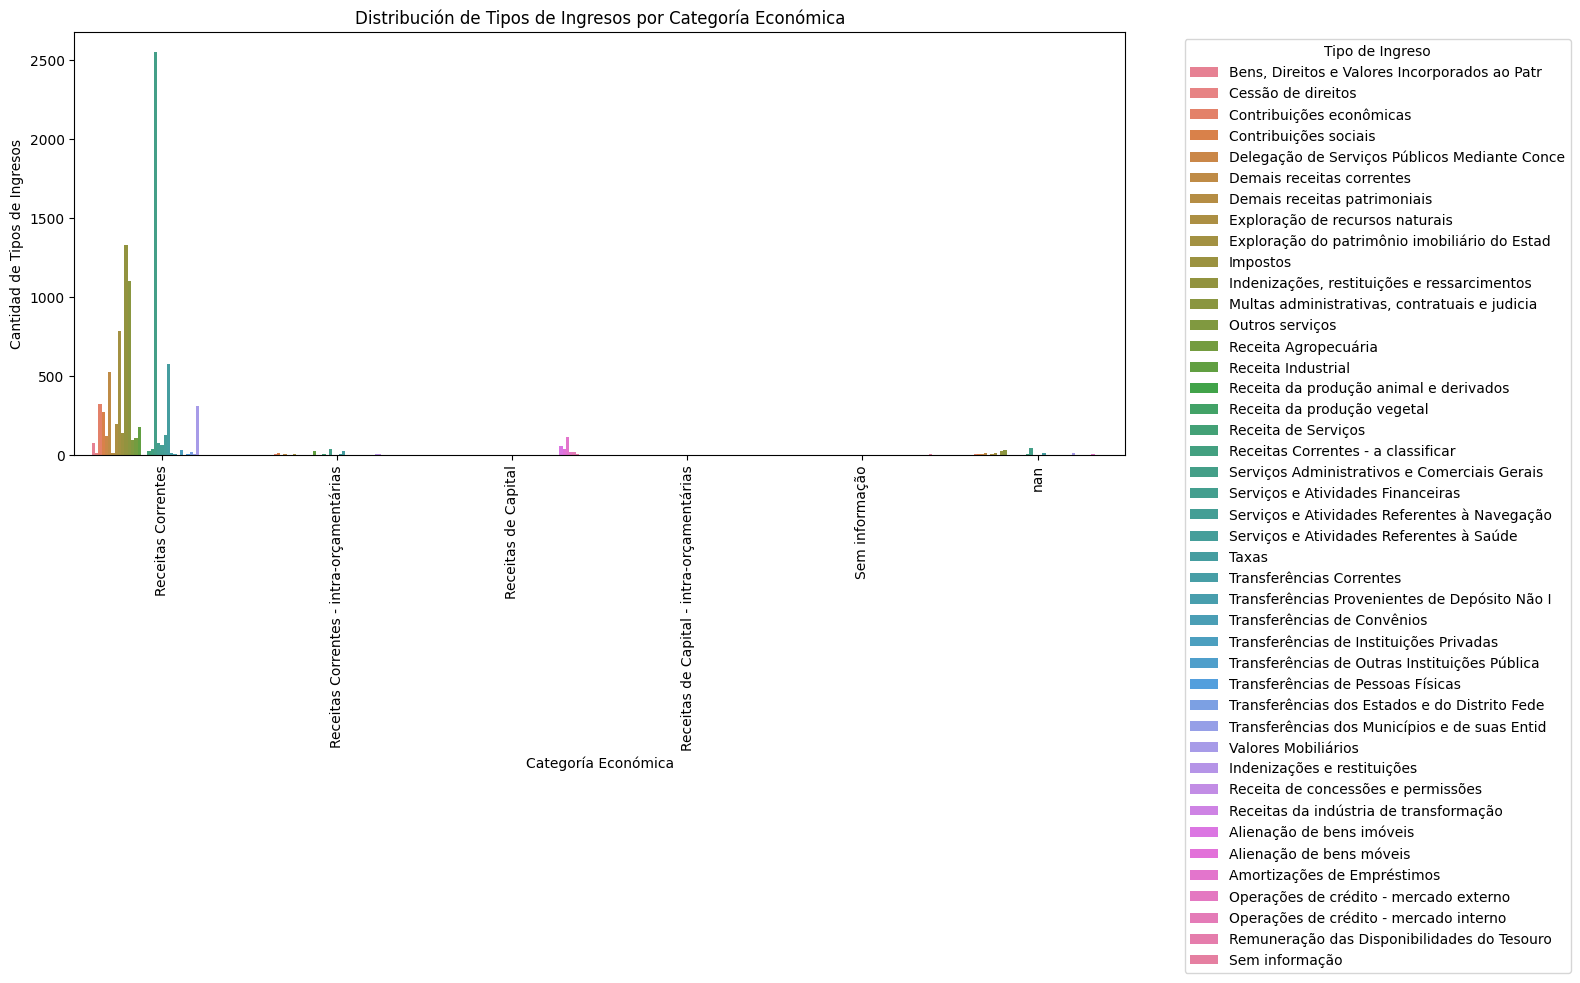

In [ ]:
categoria_tipo_ingreso = df_muestra.groupby(["CATEGORÍA ECONÓMICA", "TIPO DE INGRESO"]).size().reset_index(name="COUNT")
plt.figure(figsize=(16, 8))
sns.barplot(data=categoria_tipo_ingreso, x="CATEGORÍA ECONÓMICA", y="COUNT", hue="TIPO DE INGRESO")
plt.title("Distribución de Tipos de Ingresos por Categoría Económica")
plt.xlabel("Categoría Económica")
plt.ylabel("Cantidad de Tipos de Ingresos")
plt.xticks(rotation=90)
plt.legend(title="Tipo de Ingreso", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# No observamos nada sorprendente, los pagos corrientes son los que mas se repiten


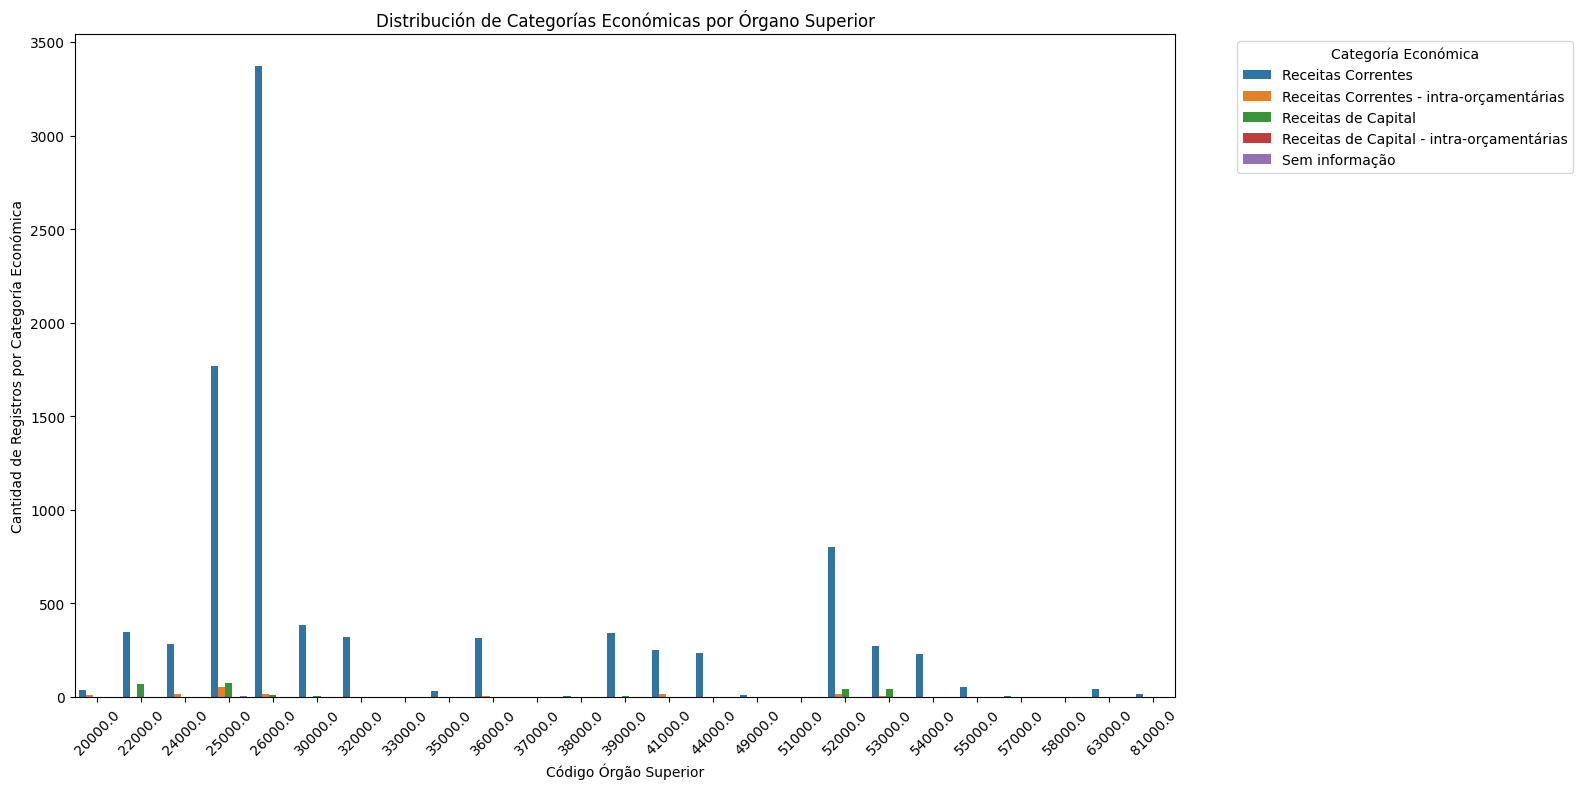

In [ ]:
orgao_categoria_ingreso = df_muestra.groupby(["CÓDIGO ORGANISMO SUPERIOR", "CATEGORÍA ECONÓMICA"]).size().reset_index(name="COUNT")
plt.figure(figsize=(16, 8))
sns.barplot(data=orgao_categoria_ingreso, x="CÓDIGO ORGANISMO SUPERIOR", y="COUNT", hue="CATEGORÍA ECONÓMICA")
plt.title("Distribución de Categorías Económicas por Órgano Superior")
plt.xlabel("Código Órgão Superior")
plt.ylabel("Cantidad de Registros por Categoría Económica")
plt.xticks(rotation=45)
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

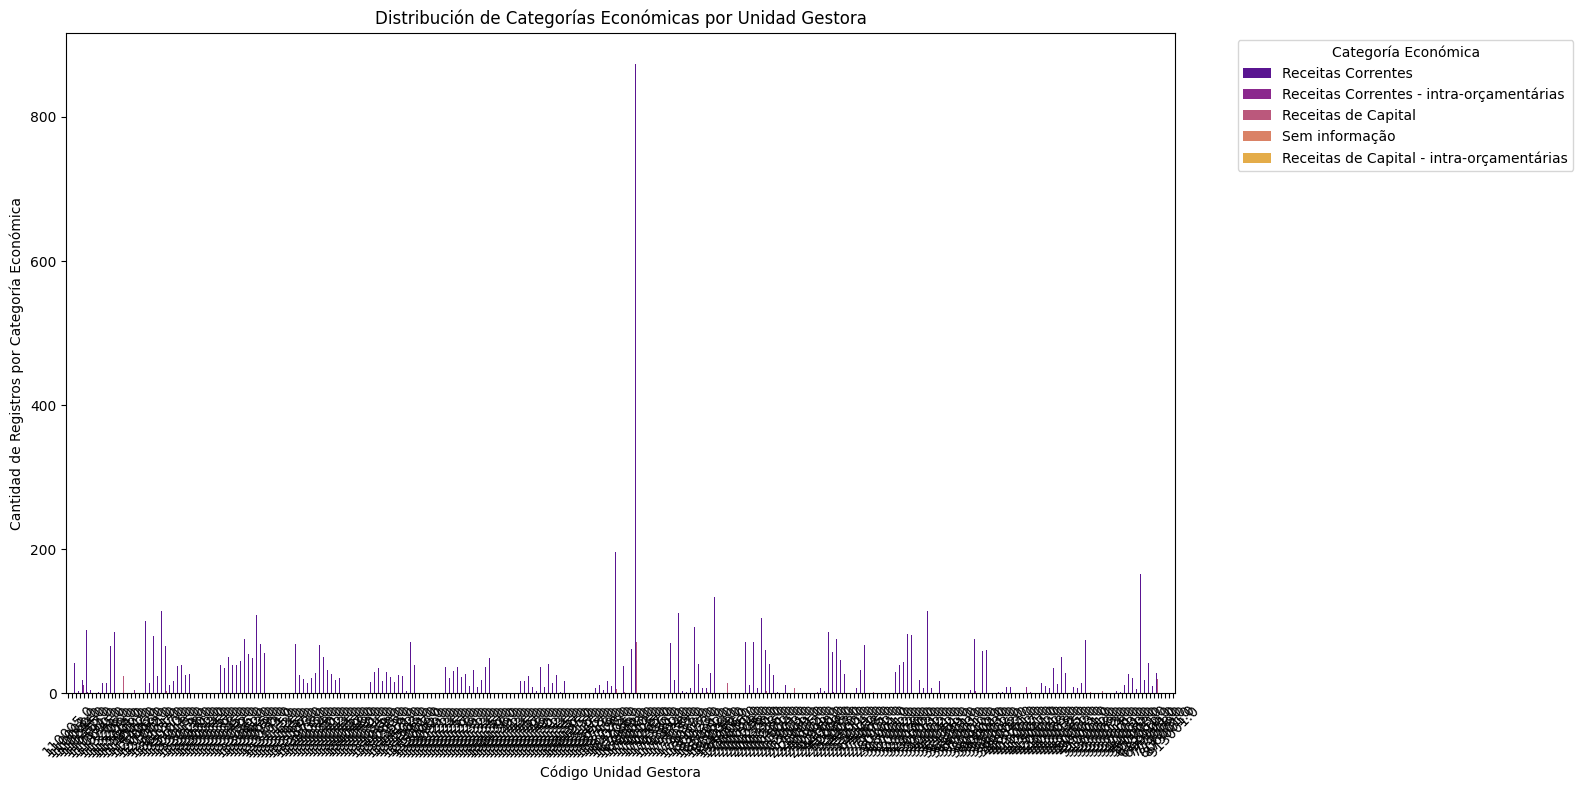

In [ ]:
unidad_categoria_ingreso = df_muestra.groupby(["CÓDIGO UNIDAD GESTORA", "CATEGORÍA ECONÓMICA"]).size().reset_index(name="COUNT")
plt.figure(figsize=(16, 8))
sns.barplot(data=unidad_categoria_ingreso, x="CÓDIGO UNIDAD GESTORA", y="COUNT", hue="CATEGORÍA ECONÓMICA", palette="plasma")

plt.title("Distribución de Categorías Económicas por Unidad Gestora")
plt.xlabel("Código Unidad Gestora")
plt.ylabel("Cantidad de Registros por Categoría Económica")
plt.xticks(rotation=45)
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


#Esta grafica es totalmente interpretable, voy a tratar de mostrar lo mas relevante

    CÓDIGO UNIDAD GESTORA                       CATEGORÍA ECONÓMICA  COUNT
35               135037.0                        Receitas Correntes    114
36               135037.0  Receitas Correntes - intra-orçamentárias      1
37               135037.0                       Receitas de Capital      9
66               153079.0                        Receitas Correntes    109
67               153079.0  Receitas Correntes - intra-orçamentárias      1


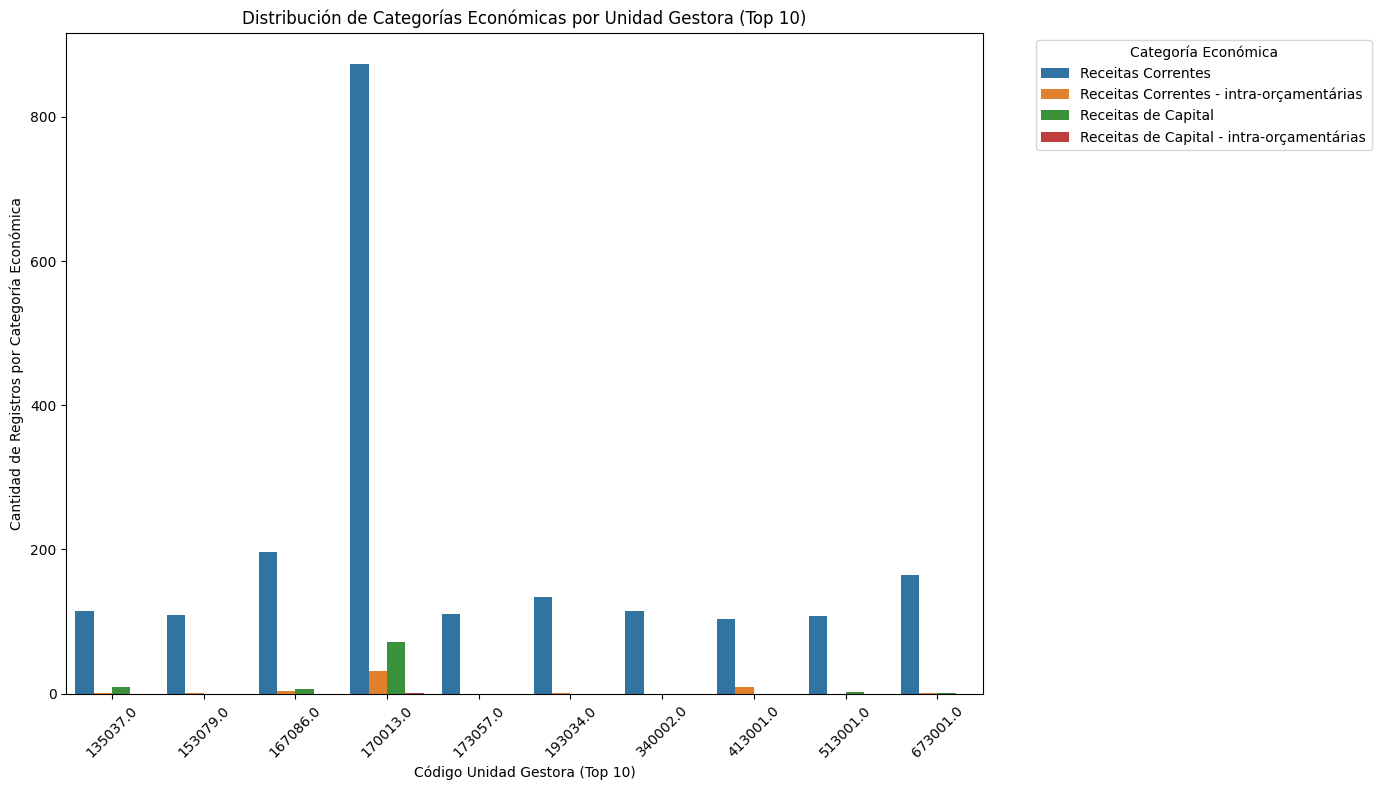

In [ ]:
top_unidades = unidad_categoria_ingreso.groupby("CÓDIGO UNIDAD GESTORA")["COUNT"].sum().nlargest(10).index
unidad_categoria_filtrada = unidad_categoria_ingreso[unidad_categoria_ingreso["CÓDIGO UNIDAD GESTORA"].isin(top_unidades)]
print(unidad_categoria_filtrada.head())
plt.figure(figsize=(14, 8))
sns.barplot(data=unidad_categoria_filtrada, x="CÓDIGO UNIDAD GESTORA", y="COUNT", hue="CATEGORÍA ECONÓMICA")
plt.title("Distribución de Categorías Económicas por Unidad Gestora (Top 10)")
plt.xlabel("Código Unidad Gestora (Top 10)")
plt.ylabel("Cantidad de Registros por Categoría Económica")
plt.xticks(rotation=45)
plt.legend(title="Categoría Económica", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


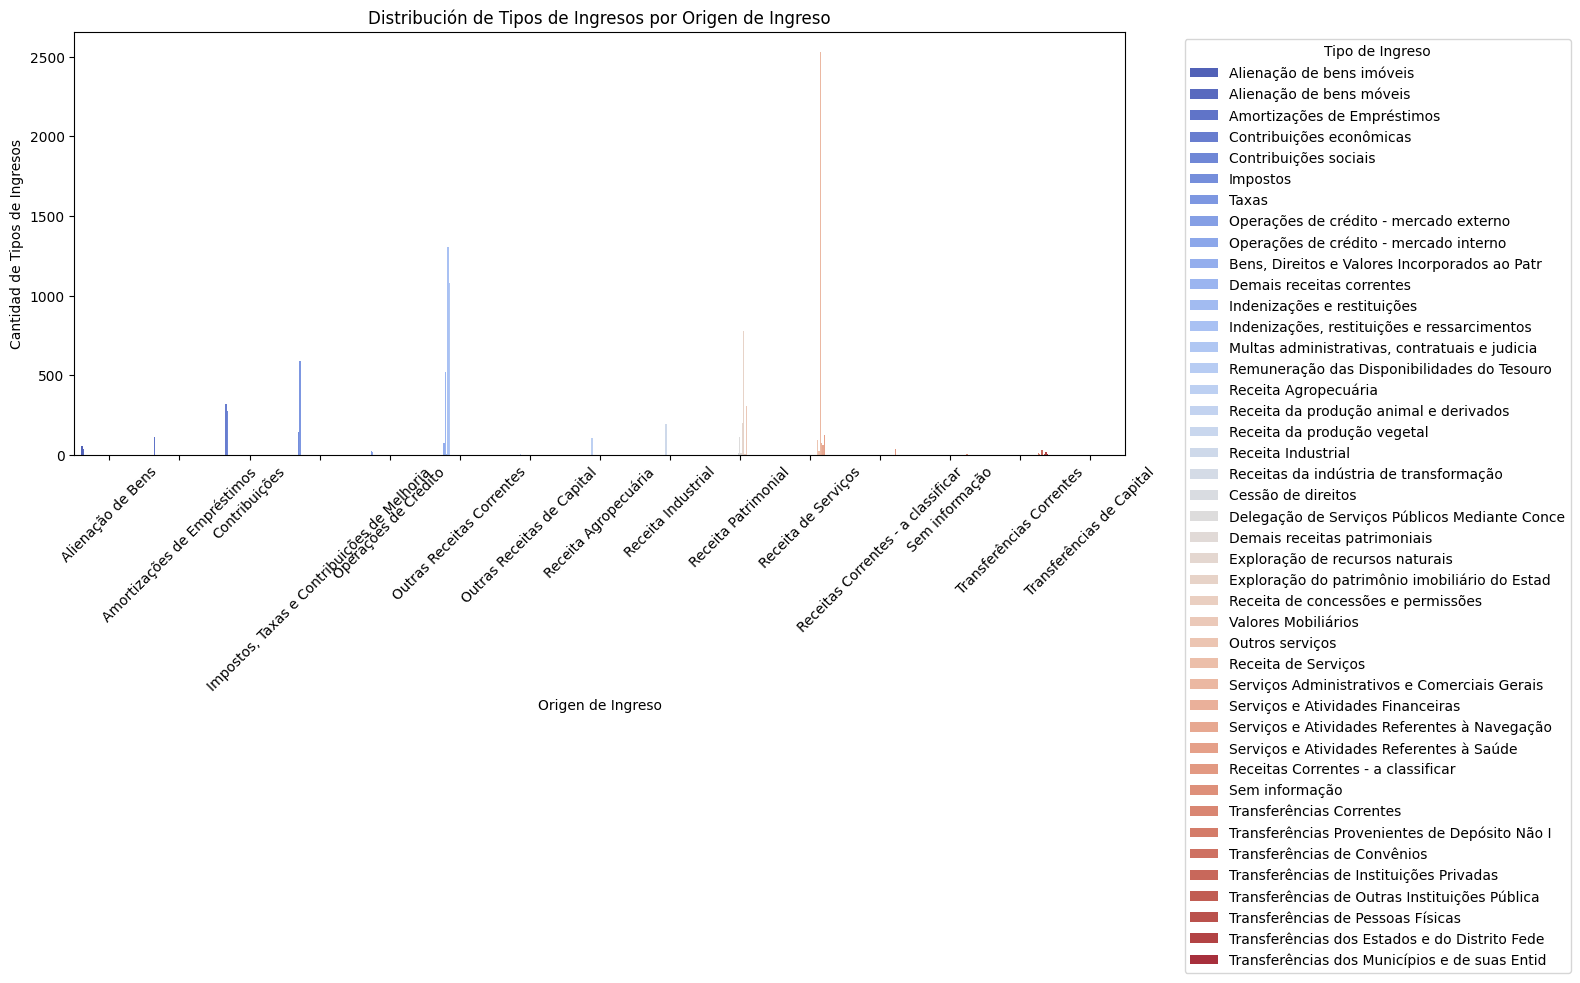

In [97]:
origen_especie_ingreso = df_muestra.groupby(["ORIGEN DE INGRESOS", "TIPO DE INGRESO"]).size().reset_index(name="COUNT")
plt.figure(figsize=(16, 8))
sns.barplot(data=origen_especie_ingreso, x="ORIGEN DE INGRESOS", y="COUNT", hue="TIPO DE INGRESO", palette="coolwarm")
plt.title("Distribución de Tipos de Ingresos por Origen de Ingreso")
plt.xlabel("Origen de Ingreso")
plt.ylabel("Cantidad de Tipos de Ingresos")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Ingreso", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

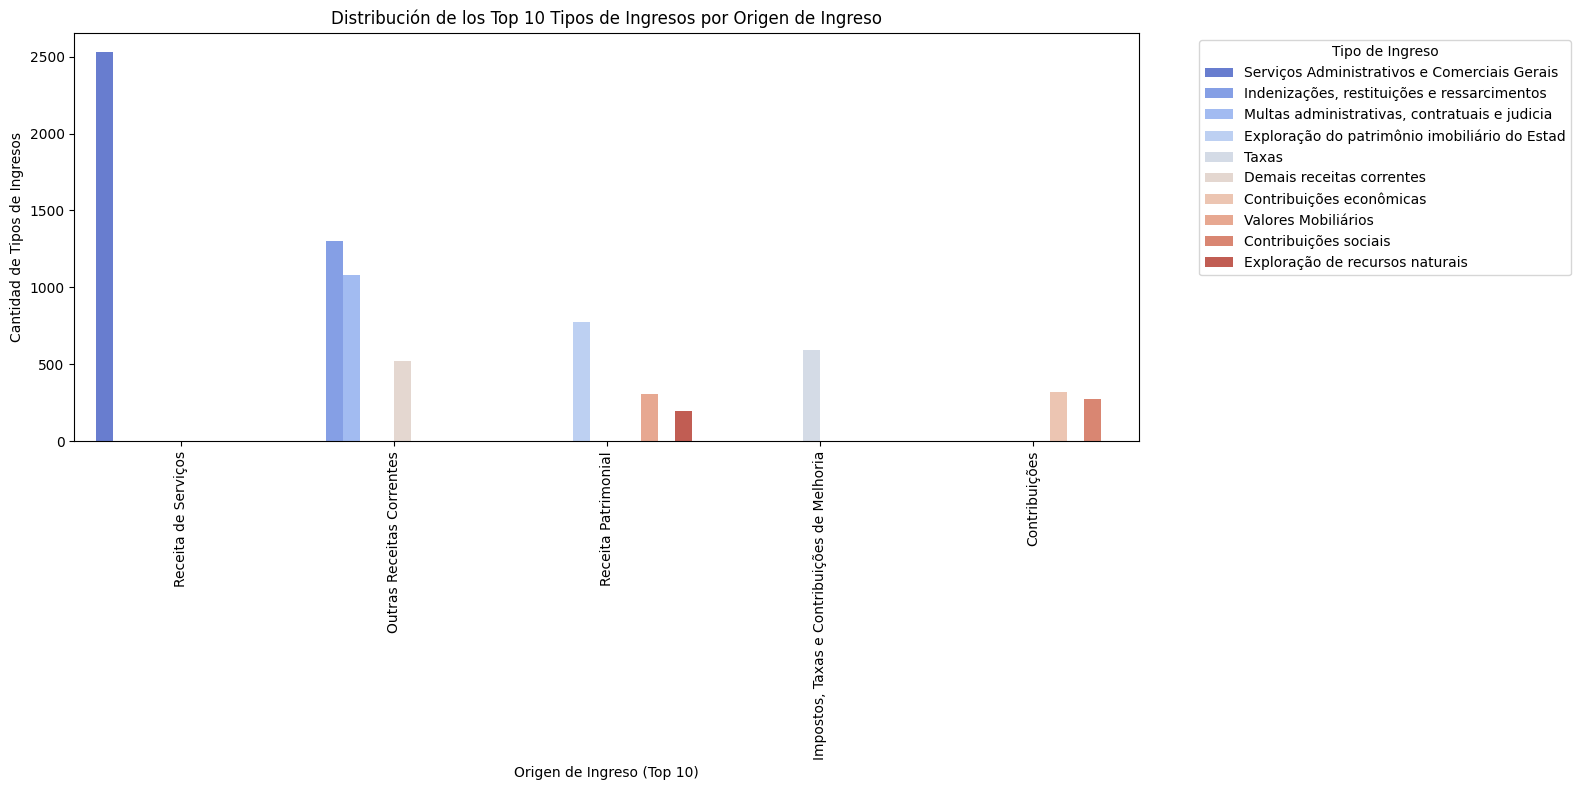

In [100]:
top_10_origen_especie = origen_especie_ingreso.nlargest(10, "COUNT")
plt.figure(figsize=(16, 8))
sns.barplot(data=top_10_origen_especie, x="ORIGEN DE INGRESOS", y="COUNT", hue="TIPO DE INGRESO", palette="coolwarm")
plt.title("Distribución de los Top 10 Tipos de Ingresos por Origen de Ingreso")
plt.xlabel("Origen de Ingreso (Top 10)")
plt.ylabel("Cantidad de Tipos de Ingresos")
plt.xticks(rotation=90)
plt.legend(title="Tipo de Ingreso", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()